In [177]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction/stock_yfinance_data.csv
/kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction/stock_tweets.csv


In [178]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [179]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [181]:
mkdir ~/nltk_data

mkdir: cannot create directory ‘/root/nltk_data’: File exists


In [182]:
import nltk
nltk.data.path.append("~/nltk_data")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [183]:
import nltk
nltk.data.path.append("~/nltk_data")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [184]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '~/nltk_data', '~/nltk_data', '~/nltk_data', '~/nltk_data', '~/nltk_data', '~/nltk_data', '~/nltk_data', '~/nltk_data']


In [185]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [186]:
import warnings
warnings.filterwarnings("ignore")

# Basic Feature Extraction

In [187]:
train = pd.read_csv('/kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction/stock_tweets.csv')

In [188]:
# Replace 'your_dataset.csv' with the actual path to your dataset file
dataset = pd.read_csv('/kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction/stock_tweets.csv')

In [189]:
train.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [190]:
import pandas as pd

# Assuming you have a DataFrame named 'train'
# and you want to drop rows with values other than 'TSLA' in the 'Stock Name' column

# Filter rows where 'Stock Name' is 'TSLA'
train = train[train['Stock Name'] == 'TSLA']

# Now, 'filtered_train' contains only rows with 'TSLA' in the 'Stock Name' column

In [191]:
import pandas as pd

# Assuming you have a DataFrame named 'train'
# and you want to drop rows with values other than 'TSLA' in the 'Stock Name' column

# Filter rows where 'Stock Name' is 'TSLA'
dataset = dataset[dataset['Stock Name'] == 'TSLA']

# Now, 'filtered_train' contains only rows with 'TSLA' in the 'Stock Name' column

In [192]:
train.shape

(37422, 4)

## Handling User Mentions and Hashtags:

In [193]:
import re

# Define functions to extract user mentions and hashtags
def extract_user_mentions(text):
    # Use regex to find user mentions (e.g., @username)
    user_mentions = re.findall(r'@(\w+)', text)
    return user_mentions

def extract_hashtags(text):
    # Use regex to find hashtags (e.g., #topic)
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

# Apply the functions to the 'body' column
train['user_mentions'] = train['Tweet'].apply(extract_user_mentions)
train['hashtags'] = train['Tweet'].apply(extract_hashtags)

In [194]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[]
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",[],[]
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",[],[]
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[]
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[]


## Expand Contractions 

In [195]:
# Define a dictionary of common contractions and their expansions
contraction_dict = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "he'll": "he will",
    "he'd": "he would",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "they'll": "they will",
    "they'd": "they would",
    "wasn't": "was not",
    "we're": "we are",
    "we'll": "we will",
    "we'd": "we would",
    "weren't": "were not",
    "what's": "what is",
    "won't": "will not",
    "wouldn't": "would not",
    "you're": "you are",
    "you'll": "you will",
    "you'd": "you would",
    # Add more contractions and expansions as needed
}

# Define a function to expand contractions using the dictionary
def expand_contractions_manual(text):
    words = text.split()
    expanded_words = [contraction_dict[word] if word in contraction_dict else word for word in words]
    return ' '.join(expanded_words)

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(expand_contractions_manual)

In [196]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[]
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",[],[]
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",[],[]
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[]
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[]


## Lower Case

In [197]:
train['Tweet'] = train['Tweet'].str.lower()

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37422 entries, 0 to 37421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           37422 non-null  object
 1   Tweet          37422 non-null  object
 2   Stock Name     37422 non-null  object
 3   Company Name   37422 non-null  object
 4   user_mentions  37422 non-null  object
 5   hashtags       37422 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [199]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
21715,2022-02-06 15:38:24+00:00,"2/ ev adoption is soaring (2021 4q 9.4%), and ...",TSLA,"Tesla, Inc.",[],[]
33805,2021-10-28 18:36:16+00:00,great insight from ron baron about the lengths...,TSLA,"Tesla, Inc.",[],[]
24530,2022-01-14 12:28:51+00:00,oh no! the $tsla cybertruck has been delayed! ...,TSLA,"Tesla, Inc.",[],[]
26270,2022-01-02 16:45:40+00:00,$tsla investors right now. https://t.co/fggtup...,TSLA,"Tesla, Inc.",[],[]
27194,2021-12-24 18:17:39+00:00,$tsla $fubo $mara all had vol above avg &amp; ...,TSLA,"Tesla, Inc.",[],[]
36345,2021-10-11 13:52:14+00:00,stocks start the week a bit higher led by sola...,TSLA,"Tesla, Inc.",[],[]
16243,2022-04-07 23:20:50+00:00,$tsla will hit a new ath tomorrow.,TSLA,"Tesla, Inc.",[],[]
9438,2022-06-05 13:20:27+00:00,250 thousand friends - twitter. the most power...,TSLA,"Tesla, Inc.",[],[]
30066,2021-11-25 20:37:51+00:00,where most car companies take at least 1-3 yea...,TSLA,"Tesla, Inc.",[],[Tesla]
26465,2021-12-31 16:45:26+00:00,i feel emence gratitude today for all of my tw...,TSLA,"Tesla, Inc.",[],[]


## Removing punctuations

In [200]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove punctuation from a text string
def remove_punctuation(text):
    # Use regex to remove all non-alphanumeric characters (including punctuation)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_punctuation)

In [201]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
33289,2021-11-01 15:50:31+00:00,split the damn stock tsla,TSLA,"Tesla, Inc.",[],[]
25150,2022-01-10 02:00:17+00:00,tesla cybertruck is delayed and we are not sur...,TSLA,"Tesla, Inc.",[Tesla],[]
36599,2021-10-08 13:45:10+00:00,cramer ranting about farley and f again just g...,TSLA,"Tesla, Inc.",[],[]
29875,2021-11-29 02:18:08+00:00,sawyermerritt wholemarsblog elonmusk tesla rig...,TSLA,"Tesla, Inc.","[SawyerMerritt, WholeMarsBlog, elonmusk, Tesla]",[]
23734,2022-01-21 22:35:50+00:00,news tesla is now accepting questions for thei...,TSLA,"Tesla, Inc.",[tesla],[]
17124,2022-03-31 04:15:40+00:00,httpstcolx6fxa7aq2 tesla stock going signific...,TSLA,"Tesla, Inc.",[],"[Tesla, TSLA, TeslaStock, ElonMusk]"
28983,2021-12-07 14:11:09+00:00,an 886 share order just executed at 1009 someo...,TSLA,"Tesla, Inc.",[],[]
19062,2022-03-11 01:41:22+00:00,the more i digest this report the more concern...,TSLA,"Tesla, Inc.",[],[]
2450,2022-08-27 17:40:39+00:00,agusnox bama_sass elonmusk tesla dont ask for ...,TSLA,"Tesla, Inc.","[agusnox, Bama_Sass, elonmusk, Tesla]",[]
18211,2022-03-22 12:38:51+00:00,giga berlin drone fly through video elonmusk t...,TSLA,"Tesla, Inc.","[elonmusk, Tesla]",[DeliveryDay]


## Removig Special Characters

In [202]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove special characters from a text string
def remove_special_characters(text):
    # Use regex to remove all non-alphanumeric characters (including special characters)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_special_characters)

In [203]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
33684,2021-10-29 16:54:21+00:00,if i can this weekend i might do a youtube htt...,TSLA,"Tesla, Inc.",[],[]
1000,2022-09-16 08:35:22+00:00,httpstcol2hrnwsigz big tesla bear flips but i...,TSLA,"Tesla, Inc.",[],"[Tesla, TSLA, TeslaStock, ElonMusk, TeslaBear]"
23298,2022-01-25 23:16:40+00:00,mcdonalds tesla you should start accepting the...,TSLA,"Tesla, Inc.","[McDonalds, Tesla]",[]
10496,2022-05-24 22:30:58+00:00,see amzn stock lost 95 of its value in 2000 it...,TSLA,"Tesla, Inc.",[],[]
3232,2022-08-18 16:24:52+00:00,markets turned has to be some headline out the...,TSLA,"Tesla, Inc.",[],[]
10404,2022-05-25 19:31:27+00:00,we all now wait to see if nvda is going to tan...,TSLA,"Tesla, Inc.",[],[]
36089,2021-10-14 04:16:36+00:00,httpstcotxxhfxveei ev inflection point tesla ...,TSLA,"Tesla, Inc.",[Tesla],"[Tesla, Apple]"
6683,2022-07-12 22:52:43+00:00,i believe tsla will be down big tomorrow as mu...,TSLA,"Tesla, Inc.",[],[]
24827,2022-01-12 16:24:20+00:00,tsla clear inverse relationship with 10yr ty l...,TSLA,"Tesla, Inc.",[],[]
13650,2022-04-27 20:37:24+00:00,cathie wood down about 13 million in tdoc afte...,TSLA,"Tesla, Inc.",[],[]


## Removing URLs

In [204]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove URLs from a text string
def remove_urls(text):
    # Use regex to remove URLs from the text
    text = re.sub(r'http\S+|www.\S+', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_urls)

## Removing words and digits containing digits 

In [205]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove words and digits containing digits from a text string
def remove_words_with_digits(text):
    # Use regex to remove words and digits containing digits from the text
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_words_with_digits)

In [206]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
34215,2021-10-26 11:49:51+00:00,congrats elonmusktesla for continuing to put p...,TSLA,"Tesla, Inc.","[elonmusk, Tesla]",[]
14075,2022-04-25 13:34:48+00:00,elonmusk ppathole tesla spacex neuralink borin...,TSLA,"Tesla, Inc.","[elonmusk, PPathole, Tesla, SpaceX, neuralink,...",[]
29680,2021-12-01 01:15:01+00:00,trade plan for wednesday spx can start to bou...,TSLA,"Tesla, Inc.",[],[]
12052,2022-05-12 14:12:34+00:00,its working tsla,TSLA,"Tesla, Inc.",[],[]
16831,2022-04-02 21:37:11+00:00,dont be surprised if tesla delivers a killer r...,TSLA,"Tesla, Inc.",[],[Tesla]
26225,2022-01-02 18:43:16+00:00,it will be great fun to read ws analysts with ...,TSLA,"Tesla, Inc.",[],[]
11424,2022-05-19 01:57:22+00:00,tesla model y and model outsell all other car...,TSLA,"Tesla, Inc.","[elonmusk, tesla]",[]
4206,2022-08-09 12:30:26+00:00,good morning traders thanks for checking out ...,TSLA,"Tesla, Inc.",[],[stickynote]
25198,2022-01-09 11:57:41+00:00,alexsmirnov tesla metamask elonmusk thatd make...,TSLA,"Tesla, Inc.","[AlexSmirnov__, Tesla, MetaMask, elonmusk]",[]
32255,2021-11-08 04:45:06+00:00,elonmusk you wont do this borrow against the s...,TSLA,"Tesla, Inc.",[elonmusk],[]


## Tokenization

In [207]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [208]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Assuming 'train' is your DataFrame and 'body' is the text column to tokenize
train['tweet_tokens'] = train['Tweet'].apply(word_tokenize)

In [209]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens
18240,2022-03-22 07:38:32+00:00,giga berlin delivery day tsla tesla ev,TSLA,"Tesla, Inc.",[],"[Tesla, EV]","[giga, berlin, delivery, day, tsla, tesla, ev]"
11860,2022-05-14 14:43:38+00:00,i will never buy a tesla car when i go electri...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[],"[i, will, never, buy, a, tesla, car, when, i, ..."
28223,2021-12-14 22:33:22+00:00,ev adoption is exploding globally no other way...,TSLA,"Tesla, Inc.",[elonmusk],[],"[ev, adoption, is, exploding, globally, no, ot..."
1602,2022-09-08 15:16:26+00:00,bought shares tsla today in my self directed...,TSLA,"Tesla, Inc.",[],[],"[bought, shares, tsla, today, in, my, self, di..."
6426,2022-07-15 21:45:36+00:00,next week is earnings week tsla wonder if elon...,TSLA,"Tesla, Inc.",[elonmusk],[],"[next, week, is, earnings, week, tsla, wonder,..."
35060,2021-10-22 02:01:56+00:00,happy first birthday fsd beta heres to many mo...,TSLA,"Tesla, Inc.",[elonmusk],[],"[happy, first, birthday, fsd, beta, heres, to,..."
7648,2022-06-29 20:37:11+00:00,tsla slams at full acceleration in to woman lo...,TSLA,"Tesla, Inc.",[],[],"[tsla, slams, at, full, acceleration, in, to, ..."
3522,2022-08-15 19:15:14+00:00,twitter twtr neednt name most workers who ass...,TSLA,"Tesla, Inc.",[],[],"[twitter, twtr, neednt, name, most, workers, w..."
14553,2022-04-21 12:23:53+00:00,i am up around on my tsla trade within hours...,TSLA,"Tesla, Inc.",[],[],"[i, am, up, around, on, my, tsla, trade, withi..."
23746,2022-01-21 21:00:09+00:00,yes listened to recording and reminded me of ...,TSLA,"Tesla, Inc.",[heydave7],[],"[yes, listened, to, recording, and, reminded, ..."


## Removing Gibberish Words

In [210]:
import nltk
from nltk.corpus import words

# Download the NLTK words dataset if you haven't already
nltk.download('words')

# Create a set of English words from the NLTK words dataset
english_words = set(words.words())

# Define a function to remove gibberish words from a list of tokens
def remove_gibberish(tokens):
    cleaned_tokens = [token for token in tokens if token.lower() in english_words]
    return cleaned_tokens

# Assuming 'corrected_tweets' is your corrected tweet column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_gibberish)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


## Stop Word Removal

In [211]:
import nltk
nltk.data.path.append('/kaggle/working/nltk_data')

In [212]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [213]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [214]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

False

In [215]:
!mkdir -p /usr/share/nltk_data/corpora
!wget -P /usr/share/nltk_data/corpora/ http://nltk.org/nltk_data/packages/corpora/wordnet.zip
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

--2023-10-01 09:23:14--  http://nltk.org/nltk_data/packages/corpora/wordnet.zip
Resolving nltk.org (nltk.org)... 15.197.142.173, 3.33.152.147
Connecting to nltk.org (nltk.org)|15.197.142.173|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-10-01 09:23:15 ERROR 404: Not Found.

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/cor

In [216]:
import nltk
from nltk.corpus import stopwords

# Assuming 'train' is your DataFrame and 'body_tokens' is the tokenized column
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the remove_stopwords function to the 'body_tokens' column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_stopwords)

In [217]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens
31587,2021-11-11 17:46:55+00:00,waypoints has arrived tsla elonmusk,TSLA,"Tesla, Inc.",[elonmusk],[],[]
9549,2022-06-03 19:59:58+00:00,have a good weekend everyone rough day hopeful...,TSLA,"Tesla, Inc.",[],[],"[good, weekend, everyone, rough, day, hopefull..."
10420,2022-05-25 17:12:33+00:00,markets going to take a breather now into the ...,TSLA,"Tesla, Inc.",[],[],"[going, take, breather, fed]"
849,2022-09-18 12:41:11+00:00,sell everything buy tsla,TSLA,"Tesla, Inc.",[],[],"[sell, everything, buy]"
13472,2022-04-29 01:32:07+00:00,after a record quarter elon gave us a gift let...,TSLA,"Tesla, Inc.",[],[],"[record, quarter, gave, us, gift, us, buy, aro..."
36060,2021-10-14 12:27:52+00:00,just dropped my shares from ahs yesterday at ...,TSLA,"Tesla, Inc.",[],[],"[yesterday, nice, almost, overnight, dont, tru..."
4183,2022-08-09 15:55:56+00:00,tsla only away from the point of no return on...,TSLA,"Tesla, Inc.",[],[],"[away, point, return, previous, swing, high, s..."
15556,2022-04-14 01:59:26+00:00,legacy auto sales are in freefall companies a...,TSLA,"Tesla, Inc.",[],[],"[legacy, auto, behind, supply, chain, sure, ro..."
23637,2022-01-23 05:34:35+00:00,out of the many products that tesla are tackli...,TSLA,"Tesla, Inc.",[],[Tesla],"[many, tackling, one, going, move, needle, car]"
30706,2021-11-19 11:47:07+00:00,elon has business days to file new form afte...,TSLA,"Tesla, Inc.",[],[],"[business, days, file, new, form, maybe, hell,..."


## Stemming 

Stemming is Skipped, because we found Lmmatization is giving more accurate results.

## Lemmatization

In [218]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [219]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [220]:
def lemmatize_tokens(tokens):
    # Join the tokens into a space-separated string
    text = " ".join(tokens)
    
    # Process the text using spaCy
    doc = nlp(text)
    
    # Extract lemmas from spaCy's document object
    lemmas = [token.lemma_ for token in doc]
    
    return lemmas

In [221]:
# Assuming you have a DataFrame 'train' with a column 'tokenized_tweets'
# Replace 'tokenized_tweets' with the actual column name in your dataset

train['lemmatized_tweets'] = train['tweet_tokens'].apply(lemmatize_tokens)

In [222]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets
22760,2022-01-27 19:25:10+00:00,just take the damn options so we can get this...,TSLA,"Tesla, Inc.",[],[],"[take, damn, get, move, higher]","[take, damn, get, move, high]"
25905,2022-01-03 21:00:20+00:00,tsla is the best performing sampp stock yeart...,TSLA,"Tesla, Inc.",[],[],"[best, stock]","[good, stock]"
25255,2022-01-08 16:18:23+00:00,waymo still doesnt know not to park in fire la...,TSLA,"Tesla, Inc.",[],[],"[still, doesnt, know, park, fire, ride, genera...","[still, do, not, know, park, fire, ride, gener..."
29493,2021-12-02 16:59:01+00:00,maybe i should change my twitter handle from s...,TSLA,"Tesla, Inc.",[],[],"[maybe, change, twitter, handle]","[maybe, change, twitter, handle]"
27489,2021-12-22 16:07:56+00:00,might make a video of tesla safety features to...,TSLA,"Tesla, Inc.",[],[],"[might, make, video, safety, today, amazing, i...","[might, make, video, safety, today, amazing, i..."
33851,2021-10-28 12:46:57+00:00,gdp growth slowed to vs exp in as persona...,TSLA,"Tesla, Inc.",[],[],"[growth, personal, consumption, growth, fell, ...","[growth, personal, consumption, growth, fall, ..."
28870,2021-12-08 15:20:57+00:00,tsla is facing an interesting new year factor...,TSLA,"Tesla, Inc.",[],[],"[facing, interesting, new, year, coming, price...","[face, interesting, new, year, come, price, in..."
16578,2022-04-05 03:38:52+00:00,tesla has brought back phone lines for custome...,TSLA,"Tesla, Inc.",[Tesla],[],"[brought, back, phone, customer, service]","[bring, back, phone, customer, service]"
12007,2022-05-12 20:35:14+00:00,when people complain i trade the same stocks e...,TSLA,"Tesla, Inc.",[TradeZella],[],"[people, complain, trade, stocks, everyday, sh...","[people, complain, trade, stock, everyday, sho..."
20510,2022-02-21 17:01:52+00:00,futures looking ugly tsla down in germany tha...,TSLA,"Tesla, Inc.",[],[],"[looking, ugly, fall, us, know, always, anothe...","[look, ugly, fall, we, know, always, another, ..."


In [223]:
train[['tweet_tokens','lemmatized_tweets']].sample(10)

,tweet_tokens,lemmatized_tweets
25010,"[many, people, ask, go, live, come, public, ma...","[many, people, ask, go, live, come, public, ma..."
7369,"[great, result, despite, china, factory, shutd...","[great, result, despite, china, factory, shutd..."
27470,"[selling, selling, impact, value]","[sell, sell, impact, value]"
11943,"[burned, morning, different, every, day, stock...","[burn, morning, different, every, day, stock, ..."
11547,"[ark, collapse, legacy, auto, new]","[ark, collapse, legacy, auto, new]"
1807,"[awesome, thank]","[awesome, thank]"
15016,"[everyone, show, arrive, otherwise, mean, noth...","[everyone, show, arrive, otherwise, mean, noth..."
33945,"[size, million, share, print, billion, money, ...","[size, million, share, print, billion, money, ..."
26499,"[last, final, day, take, look, delivery, cente...","[last, final, day, take, look, delivery, cente..."
33681,"[rate, theyre, gon, na, need, another, split]","[rate, they, re, go, to, need, another, split]"


In [224]:
train.shape

(37422, 8)

## POS Tagging

In [225]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [226]:
# Perform POS tagging on the tokenized words
train['pos_tags'] = train['lemmatized_tweets'].apply(lambda tokens: [(token.text, token.pos_) for token in nlp(" ".join(tokens))])

train['pos_tags'].sample()

31701    [(like, INTJ), (sell, VERB), (twitter, NOUN), ...
Name: pos_tags, dtype: object

In [227]:
train['pos_tags'].sample(10)

25181    [(fun, ADJ), (fact, NOUN), (already, ADV), (se...
34476                                                   []
12438    [(anyone, PRON), (see, VERB), (guy, NOUN), (cr...
35693         [(excite, ADJ), (stock, NOUN), (week, NOUN)]
26940    [(look, VERB), (sweetie, NOUN), (got, AUX), (e...
36782    [(hear, VERB), (one, NUM), (time, NOUN), (toda...
22787    [(already, ADV), (rail, NOUN), (track, NOUN), ...
36703    [(need, VERB), (nice, ADJ), (rally, NOUN), (cl...
7469     [(bearish, ADJ), (disagree, NOUN), (think, VER...
33069    [(look, VERB), (actual, ADJ), (report, NOUN), ...
Name: pos_tags, dtype: object

## Chunking

In [228]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [229]:
# Define a custom pattern for NP (Noun Phrase) chunking
def custom_chunking(tags):
    noun_phrases = []
    current_chunk = []
    for token, pos in tags:
        if pos.startswith('N'):
            current_chunk.append(token)
        elif current_chunk:
            noun_phrases.append(current_chunk)
            current_chunk = []
    if current_chunk:
        noun_phrases.append(current_chunk)
    return noun_phrases

In [230]:
# Apply chunking to the 'pos_tags' column
train['noun_phrases'] = train['pos_tags'].apply(custom_chunking)

In [231]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor..."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]]
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]"
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]"
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]"


In [232]:
# Convert noun phrases to text
train['noun_phrases_text'] = train['noun_phrases'].apply(lambda phrases: [' '.join([token for token in phrases]) for phrases in phrases])

In [233]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text
37198,2021-10-02 15:59:36+00:00,im so excited right now im going to party smok...,TSLA,"Tesla, Inc.",[],[],"[excited, right, going, party, smoke, weed, dr...","[excite, right, go, party, smoke, weed, drink,...","[(excite, VERB), (right, INTJ), (go, VERB), (p...","[[party, smoke, weed], [bourbon], [lady], [for...","[party smoke weed, bourbon, lady, forgot]"
11305,2022-05-19 20:09:25+00:00,should tesla sell their btc stake and use the ...,TSLA,"Tesla, Inc.",[],[],"[sell, stake, use, proceeds, buy, back]","[sell, stake, use, proceed, buy, back]","[(sell, VERB), (stake, NOUN), (use, NOUN), (pr...","[[stake, use, proceed]]",[stake use proceed]
520,2022-09-22 18:28:53+00:00,cnbc just said that tsla recall is just a soft...,TSLA,"Tesla, Inc.","[ck, NHTSAgov]",[],"[said, recall, update, miracle, said, however,...","[say, recall, update, miracle, say, however, w...","[(say, VERB), (recall, PROPN), (update, PROPN)...","[[one, injury]]",[one injury]
5410,2022-07-26 17:36:37+00:00,wanted to wait for the on tsla before comment...,TSLA,"Tesla, Inc.",[],[],"[wait, sure, people, look, always, clarify, fi...","[wait, sure, people, look, always, clarify, fi...","[(wait, VERB), (sure, ADJ), (people, NOUN), (l...","[[people], [thing, strike], [report]]","[people, thing strike, report]"
1453,2022-09-09 23:50:07+00:00,comparing tsla vs bitcoin over past years,TSLA,"Tesla, Inc.",[],[Bitcoin],[past],[past],"[(past, NOUN)]",[[past]],[past]
19442,2022-03-07 00:51:04+00:00,gailalfaratx tesla teslasolar japan vigold sir...,TSLA,"Tesla, Inc.","[GailAlfarATX, Tesla, TeslaSolar, japan, vigol...",[],"[japan, honor]","[japan, honor]","[(japan, PROPN), (honor, NOUN)]",[[honor]],[honor]
9108,2022-06-09 11:15:10+00:00,capacity utilization at teslas shanghai plant ...,TSLA,"Tesla, Inc.",[],[],"[capacity, utilization, shanghai, plant, retur...","[capacity, utilization, shanghai, plant, retur...","[(capacity, NOUN), (utilization, NOUN), (shang...","[[capacity, utilization], [return, percent], [...","[capacity utilization, return percent, today]"
26730,2021-12-29 15:22:50+00:00,people will call me crazy but tsla will close ...,TSLA,"Tesla, Inc.",[],[],"[people, call, crazy, close, today]","[people, call, crazy, close, today]","[(people, NOUN), (call, VERB), (crazy, ADJ), (...","[[people], [today]]","[people, today]"
4128,2022-08-10 01:11:54+00:00,dear tsla investors if you have not figured it...,TSLA,"Tesla, Inc.",[],[],"[dear, figured, yet, musk, stocks, highest, po...","[dear, figure, yet, musk, stock, high, possibl...","[(dear, ADJ), (figure, NOUN), (yet, CCONJ), (m...","[[figure], [price], [pay, price], [luck]]","[figure, price, pay price, luck]"
31042,2021-11-16 14:57:00+00:00,tsla to generate cash flow by,TSLA,"Tesla, Inc.",[],[],"[generate, cash, flow]","[generate, cash, flow]","[(generate, VERB), (cash, NOUN), (flow, NOUN)]","[[cash, flow]]",[cash flow]


In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37422 entries, 0 to 37421
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               37422 non-null  object
 1   Tweet              37422 non-null  object
 2   Stock Name         37422 non-null  object
 3   Company Name       37422 non-null  object
 4   user_mentions      37422 non-null  object
 5   hashtags           37422 non-null  object
 6   tweet_tokens       37422 non-null  object
 7   lemmatized_tweets  37422 non-null  object
 8   pos_tags           37422 non-null  object
 9   noun_phrases       37422 non-null  object
 10  noun_phrases_text  37422 non-null  object
dtypes: object(11)
memory usage: 3.4+ MB


## NER

In [235]:
# # Define a function to perform NER on text
# def perform_ner(text):
#     doc = nlp(text)
#     ner_results = [(ent.text, ent.label_) for ent in doc.ents]
#     return ner_results

In [236]:
# # Apply NER to the 'text' column
# train['ner'] = train['Tweet'].apply(perform_ner)

## N-Grams

In [237]:
import pandas as pd
import nltk
from nltk.util import ngrams

In [238]:
# Define the desired N-gram order (e.g., 2 for bigrams)
n_gram_order = 2

# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    # Check if the sequence is long enough for the desired N-gram order
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        return []

In [239]:
# Apply N-gram extraction to the 'tokenized_text' column
train['bigrams'] = train['lemmatized_tweets'].apply(lambda x: extract_ngrams(x, n_gram_order))

In [240]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams
30375,2021-11-22 17:45:13+00:00,tsla has filed for approval of a gigafactory i...,TSLA,"Tesla, Inc.",[],[],[approval],[approval],"[(approval, NOUN)]",[[approval]],[approval],[]
11714,2022-05-16 15:16:00+00:00,someone is taking a massive longterm bet on ts...,TSLA,"Tesla, Inc.",[],[],"[someone, taking, massive, bet, today, month, ...","[someone, take, massive, bet, today, month, fl...","[(someone, PRON), (take, VERB), (massive, ADJ)...","[[bet, today, month], [million, premium, day]]","[bet today month, million premium day]","[(someone, take), (take, massive), (massive, b..."
7303,2022-07-04 22:26:50+00:00,my preliminary delivs est is which incorpora...,TSLA,"Tesla, Inc.",[],[],"[preliminary, days, upgrade, production, lost,...","[preliminary, day, upgrade, production, lose, ...","[(preliminary, ADJ), (day, NOUN), (upgrade, NO...","[[day, upgrade, production], [two, week], [shu...","[day upgrade production, two week, shutdown up...","[(preliminary, day), (day, upgrade), (upgrade,..."
15589,2022-04-13 17:31:35+00:00,morgan stanley the capex required to move of ...,TSLA,"Tesla, Inc.",[],[],"[morgan, move, global, light, vehicle, fleet, ...","[morgan, move, global, light, vehicle, fleet, ...","[(morgan, PROPN), (move, VERB), (global, ADJ),...","[[light, vehicle], [battery, think, cycle], [o...","[light vehicle, battery think cycle, one know]","[(morgan, move), (move, global), (global, ligh..."
23716,2022-01-22 01:25:23+00:00,theyre all going to learn a tough but necessar...,TSLA,"Tesla, Inc.",[],[],"[theyre, going, learn, tough, necessary, lesson]","[they, re, go, learn, tough, necessary, lesson]","[(they, PRON), (re, AUX), (go, VERB), (learn, ...",[[lesson]],[lesson],"[(they, re), (re, go), (go, learn), (learn, to..."
24455,2022-01-14 20:55:11+00:00,its a battle at tsla tesla,TSLA,"Tesla, Inc.",[],[Tesla],[battle],[battle],"[(battle, NOUN)]",[[battle]],[battle],[]
27392,2021-12-23 02:27:44+00:00,elon musk is exercising options to purchase m...,TSLA,"Tesla, Inc.",[],[],"[musk, purchase, million, per, share]","[musk, purchase, million, per, share]","[(musk, PROPN), (purchase, NOUN), (million, NU...","[[purchase, million], [share]]","[purchase million, share]","[(musk, purchase), (purchase, million), (milli..."
24551,2022-01-14 06:25:04+00:00,breaking tsla ceo elonmusk confirms tesla merc...,TSLA,"Tesla, Inc.",[elonmusk],[Dogecoin],"[breaking, merchandise, purchasable]","[break, merchandise, purchasable]","[(break, VERB), (merchandise, NOUN), (purchasa...","[[merchandise, purchasable]]",[merchandise purchasable],"[(break, merchandise), (merchandise, purchasab..."
12152,2022-05-11 20:42:22+00:00,my apologies ps no refunds on paying for his p...,TSLA,"Tesla, Inc.",[],[Tesla],"[paying, investment, advice]","[pay, investment, advice]","[(pay, VERB), (investment, NOUN), (advice, NOUN)]","[[investment, advice]]",[investment advice],"[(pay, investment), (investment, advice)]"
35292,2021-10-20 21:38:30+00:00,million production run rate secured tsla tesla,TSLA,"Tesla, Inc.",[],[Tesla],"[million, production, run, rate]","[million, production, run, rate]","[(million, NUM), (production, NOUN), (run, NOU...","[[million, production, run, rate]]",[million production run rate],"[(million, production), (production, run), (ru..."


In [241]:
# Define the desired N-gram order (e.g., 2 for bigrams)
n_gram_order = 3

# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    # Check if the sequence is long enough for the desired N-gram order
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        return []

In [242]:
# Apply N-gram extraction to the 'tokenized_text' column
train['trigrams'] = train['lemmatized_tweets'].apply(lambda x: extract_ngrams(x, n_gram_order))

In [243]:
train.head(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a..."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[]
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested..."
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ..."
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s..."
5,2022-09-29 22:25:53+00:00,realdanodowd tesla this is you,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],[],[],[],[],[],[],[]
6,2022-09-29 22:24:22+00:00,for years wholemarsblog viciously silenced tes...,TSLA,"Tesla, Inc.","[WholeMarsBlog, Tesla]",[],"[viciously, silenced, failing, silence, desper...","[viciously, silence, fail, silence, desperatel...","[(viciously, ADV), (silence, PROPN), (fail, VE...","[[silence], [company], [impotence]]","[silence, company, impotence]","[(viciously, silence), (silence, fail), (fail,...","[(viciously, silence, fail), (silence, fail, s..."
7,2022-09-29 22:23:54+00:00,nio just because i am down money does not mean...,TSLA,"Tesla, Inc.",[],[],"[money, mean, bad, investment, whole, market, ...","[money, mean, bad, investment, whole, market, ...","[(money, NOUN), (mean, VERB), (bad, ADJ), (inv...","[[money], [investment], [market]]","[money, investment, market]","[(money, mean), (mean, bad), (bad, investment)...","[(money, mean, bad), (mean, bad, investment), ..."
8,2022-09-29 22:23:28+00:00,likes for some spy tsla charts to study,TSLA,"Tesla, Inc.",[],[],"[spy, study]","[spy, study]","[(spy, NOUN), (study, NOUN)]","[[spy, study]]",[spy study],"[(spy, study)]",[]
9,2022-09-29 22:15:01+00:00,kellyroofing teslasolar elonmusk tesla the po...,TSLA,"Tesla, Inc.","[MrJames__321, KellyRoofing, TeslaSolar, elonm...",[],"[waterproof, could, bad, wiring, house, could]","[waterproof, could, bad, wiring, house, could]","[(waterproof, PROPN), (could, AUX), (bad, ADJ)...","[[wiring, house]]",[wiring house],"[(waterproof, could), (could, bad), (bad, wiri...","[(waterproof, could, bad), (could, bad, wiring..."


## TF-IDF vectorization

In [244]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [245]:
# Convert tokenized text into a single string
train['tfidf_text'] = train['lemmatized_tweets'].apply(lambda tokens: ' '.join(tokens))

In [246]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using TF-IDF vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(train['tfidf_text'])

In [247]:
# Get the TF-IDF features and their corresponding names
tfidf_features = tfidf_vectorizer.get_feature_names_out()

In [248]:
# Create a DataFrame from the TF-IDF matrix with feature names as columns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

In [249]:
# Print the DataFrame with TF-IDF values
print(tfidf_df)

        aa  aal  aback  abandon  abb  abbot  abettor  abide  ability  abject  \
0      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
1      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
2      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
3      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
4      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
...    ...  ...    ...      ...  ...    ...      ...    ...      ...     ...   
37417  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37418  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37419  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37420  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37421  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   

       ...  zeal  zee  zero  zimbabwe  

**

In [250]:
import numpy as np

# Count non-zero values in the tfidf_df DataFrame
non_zero_count = np.count_nonzero(tfidf_df.values)

# Print the count
print("Number of non-zero values in tfidf_df:", non_zero_count)

Number of non-zero values in tfidf_df: 316205


In [251]:
train.head(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a...",medium do amazing job brainwash people today w...
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[],delivery around
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested...",even include unvested additional equity x deal...
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ...",still try stop get together make something wel...
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s...",stop try kill sad derange old man
5,2022-09-29 22:25:53+00:00,realdanodowd tesla this is you,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],[],[],[],[],[],[],[],
6,2022-09-29 22:24:22+00:00,for years wholemarsblog viciously silenced tes...,TSLA,"Tesla, Inc.","[WholeMarsBlog, Tesla]",[],"[viciously, silenced, failing, silence, desper...","[viciously, silence, fail, silence, desperatel...","[(viciously, ADV), (silence, PROPN), (fail, VE...","[[silence], [company], [impotence]]","[silence, company, impotence]","[(viciously, silence), (silence, fail), (fail,...","[(viciously, silence, fail), (silence, fail, s...",viciously silence fail silence desperately chi...
7,2022-09-29 22:23:54+00:00,nio just because i am down money does not mean...,TSLA,"Tesla, Inc.",[],[],"[money, mean, bad, investment, whole, market, ...","[money, mean, bad, investment, whole, market, ...","[(money, NOUN), (mean, VERB), (bad, ADJ), (inv...","[[money], [investment], [market]]","[money, investment, market]","[(money, mean), (mean, bad), (bad, investment)...","[(money, mean, bad), (mean, bad, investment), ...",money mean bad investment whole market everyth...
8,2022-09-29 22:23:28+00:00,likes for some spy tsla charts to study,TSLA,"Tesla, Inc.",[],[],"[spy, study]","[spy, study]","[(spy, NOUN), (study, NOUN)]","[[spy, study]]",[spy study],"[(spy, study)]",[],spy study
9,2022-09-29 22:15:01+00:00,kellyroofing teslasolar elonmusk tesla the po...,TSLA,"Tesla, Inc.","[MrJames__321, KellyRoofing, TeslaSolar, elonm...",[],"[waterproof, could, bad, wiring, house, could]","[waterproof, could, bad, wiring, house, could]","[(waterproof, PROPN), (could, AUX), (bad, ADJ)...","[[wiring, house]]",[wi

## Occurrence Matrix

In [252]:
# Assuming you have a DataFrame 'tfidf_df' with TF-IDF values
# Create a copy of 'tfidf_df' to store the Occurrence Matrix
occurrence_matrix = tfidf_df.copy()

# Replace all non-zero TF-IDF values with 1 to indicate term presence
occurrence_matrix[occurrence_matrix != 0] = 1

In [253]:
# Print the Occurrence Matrix
print(occurrence_matrix)

        aa  aal  aback  abandon  abb  abbot  abettor  abide  ability  abject  \
0      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
1      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
2      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
3      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
4      0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
...    ...  ...    ...      ...  ...    ...      ...    ...      ...     ...   
37417  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37418  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37419  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37420  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   
37421  0.0  0.0    0.0      0.0  0.0    0.0      0.0    0.0      0.0     0.0   

       ...  zeal  zee  zero  zimbabwe  

## Co-occurrence Matrix

In [254]:
import pandas as pd
import numpy as np

# Assuming 'tfidf_df' contains your TF-IDF matrix
# Convert TF-IDF matrix to binary Term-Document Matrix (TDM)
tdm = (tfidf_df > 0).astype(int)

# Define the context window (e.g., 1 for immediate neighbors)
context_window = 3

# Initialize the Co-Occurrence Matrix with zeros
co_occurrence_matrix = np.zeros((tdm.shape[1], tdm.shape[1]), dtype=np.int64)

In [255]:
# Iterate through each document (row) in the TDM
for row in tdm.values:
    # Find the indices where terms (words) are present
    term_indices = np.where(row == 1)[0]

    # Update the Co-Occurrence Matrix based on the term indices within the context window
    for i, term_index in enumerate(term_indices):
        start = max(0, i - context_window)
        end = min(len(term_indices), i + context_window + 1)
        for j in range(start, end):
            if i != j:
                co_occurrence_matrix[term_index, term_indices[j]] += 1

In [256]:
# Create a DataFrame for the Co-Occurrence Matrix
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, columns=tdm.columns, index=tdm.columns)

# Now, 'co_occurrence_df' contains your Co-Occurrence Matrix

In [257]:
co_occurrence_df.sample(20)

,aa,aal,aback,abandon,abb,abbot,abettor,abide,ability,abject,...,zeal,zee,zero,zimbabwe,zipper,zippy,zombie,zone,zoo,zoom
chorus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
powered,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
detection,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
helping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
medium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
skittle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cake,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
mater,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
interrupt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
true,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Word Cloud

In [258]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Unigram Cloud

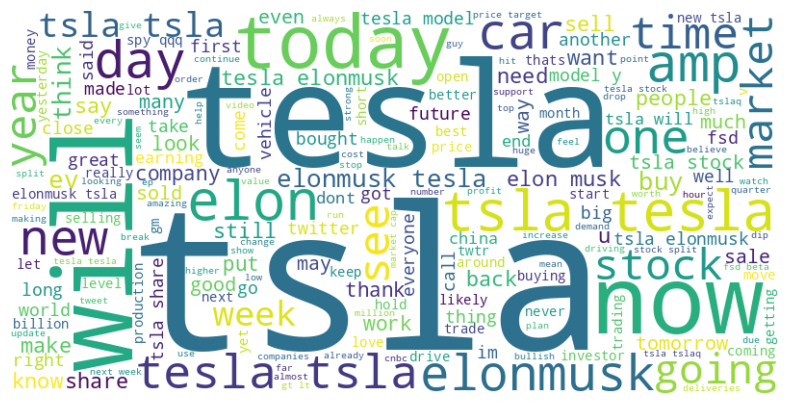

In [259]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'tweet' column contains the text data
text_data = ' '.join(train['Tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bi-Gram Cloud

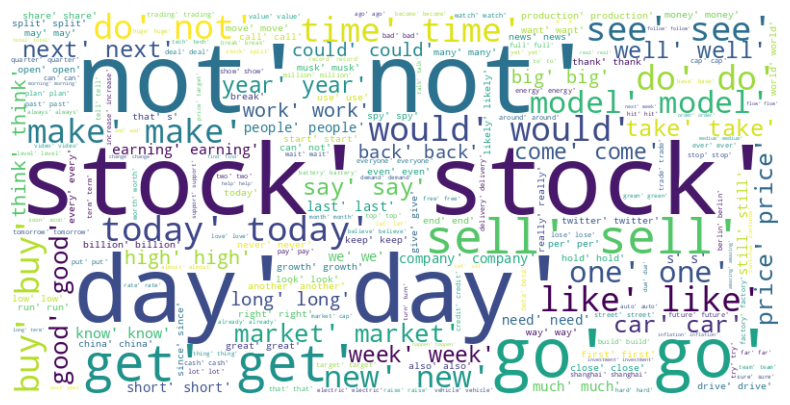

In [260]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'bigrams' column contains tuples of bigram phrases
bigram_text = ' '.join([' '.join(map(str, bigrams)) for bigrams in train['bigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

# Display the bigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tri-Gram Cloud

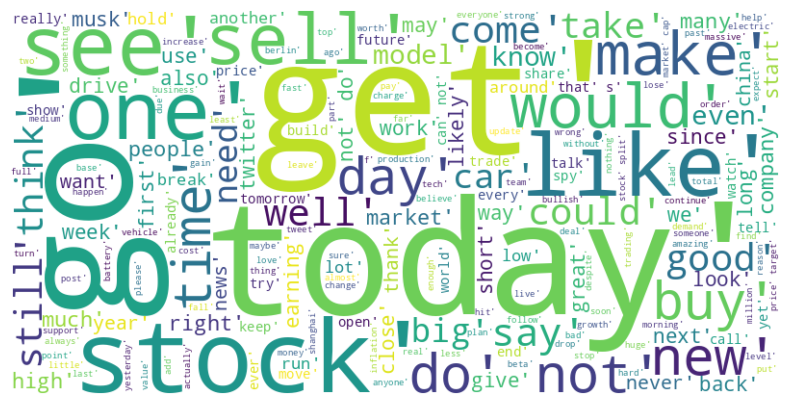

In [261]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'trigrams' column contains tuples of trigram phrases
trigram_text = ' '.join([' '.join(map(str, trigrams)) for trigrams in train['trigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)

# Display the trigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis using VADER

In [262]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'tokenized_tweets' is your tokenized tweets column in DataFrame 'df'
# Replace 'df' and 'tokenized_tweets' with your actual DataFrame and column names

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [263]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Assuming you have your lemmatized tweets in a column 'lemmatized_tweets' of your DataFrame 'train'

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    # Join the list of lemmatized words into a single string
    text = ' '.join(text)
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the tokenized tweets column and create a new column for sentiment scores
train['sentiment_scores'] = train['lemmatized_tweets'].apply(get_sentiment_scores)

In [264]:
# Extract the compound sentiment score, which is a normalized compound score between -1 (negative) and 1 (positive)
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [265]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score
21601,2022-02-08 00:48:56+00:00,while in berlin a fellow tsla investor setup a...,TSLA,"Tesla, Inc.",[],[],"[berlin, fellow, investor, setup, dinner, date...","[berlin, fellow, investor, setup, dinner, date...","[(berlin, PROPN), (fellow, PROPN), (investor, ...","[[investor, setup, dinner, date], [world], [tw...","[investor setup dinner date, world, two, mind]","[(berlin, fellow), (fellow, investor), (invest...","[(berlin, fellow, investor), (fellow, investor...",berlin fellow investor setup dinner date we ne...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5814,2022-07-21 15:08:03+00:00,tsla the small criminal car company now has a ...,TSLA,"Tesla, Inc.",[],[],"[small, criminal, car, company, market, cap, b...","[small, criminal, car, company, market, cap, b...","[(small, ADJ), (criminal, ADJ), (car, NOUN), (...","[[car, company, market, cap, billion], [warnin...","[car company market cap billion, warning force]","[(small, criminal), (criminal, car), (car, com...","[(small, criminal, car), (criminal, car, compa...",small criminal car company market cap billion ...,"{'neg': 0.328, 'neu': 0.475, 'pos': 0.197, 'co...",-0.2992
10240,2022-05-27 13:20:26+00:00,we own tesla the king of evs and autonomy pole...,TSLA,"Tesla, Inc.",[],[],"[king, autonomy, polestar, prince, jack, micro...","[king, autonomy, polestar, prince, jack, micro...","[(king, NOUN), (autonomy, NOUN), (polestar, NO...","[[king, autonomy, polestar], [impact, climate]]","[king autonomy polestar, impact climate]","[(king, autonomy), (autonomy, polestar), (pole...","[(king, autonomy, polestar), (autonomy, polest...",king autonomy polestar prince jack micro mobil...,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",0.7269
14753,2022-04-20 20:29:44+00:00,tsla pe ratio has dropped from to,TSLA,"Tesla, Inc.",[],[],[ratio],[ratio],"[(ratio, NOUN)]",[[ratio]],[ratio],[],[],ratio,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2430,2022-08-27 20:20:15+00:00,last night i tried fsd beta my mind is litera...,TSLA,"Tesla, Inc.",[Tesla],[],"[last, night, tried, beta, mind, literally, bl...","[last, night, try, beta, mind, literally, blow...","[(last, ADJ), (night, NOUN), (try, VERB), (bet...","[[night], [mind], [rate, improvement], [team],...","[night, mind, rate improvement, team, amount t...","[(last, night), (night, try), (try, beta), (be...","[(last, night, try), (night, try, beta), (try,...",last night try beta mind literally blow away r...,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.6486
11569,2022-05-17 22:47:47+00:00,ive learned to be wary now when elon runs a po...,TSLA,"Tesla, Inc.",[],[],"[learned, wary, poll, hopefully, walk, away, d...","[learn, wary, poll, hopefully, walk, away, dea...","[(learn, VERB), (wary, ADJ), (poll, NOUN), (ho...","[[poll], [deal]]","[poll, deal]","[(learn, wary), (wary, poll), (poll, hopefully...","[(learn, wary, poll), (wary, poll, hopefully),...",learn wary poll hopefully walk away deal would...,"{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp...",0.4019
9048,2022-06-09 19:16:46+00:00,thats what master plan part is how do you get...,TSLA,"Tesla, Inc.",[elonmusk],[evolution],"[thats, master, plan, part, get, enough, scale...","[that, s, master, plan, part, get, enough, sca...","[(that, PRON), (s, VERB), (master, NOUN), (pla...","[[master, plan, part], [scale], [energy, infra...","[master plan part, scale, energy infrastructur...","[(that, s), (s, master), (master, plan), (plan...","[(that, s, master), (s, master, plan), (master...",that s master plan part get enough scale actua...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.2732
20384,2022-02-23 00:20:10+00:00,regardless of what tslaq trolls have to say ts...,TSLA,"Tesla, Inc.",[],[],"[regardless, say, risen, based, previous, due]","[regardless, say, risen, ba

## Hierarchical Clustering

In [266]:
# import pandas as pd
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame 'tfidf_df' with TF-IDF values

# # Perform Hierarchical Clustering
# linkage_matrix = linkage(tfidf_df, method='ward', metric='euclidean')

# # Determine the optimal number of clusters using a dendrogram
# plt.figure(figsize=(12, 6))
# dendrogram(linkage_matrix, truncate_mode='level', p=5)
# plt.xlabel('Number of clusters')
# plt.ylabel('Distance')
# plt.title('Dendrogram')
# plt.show()

In [267]:
# # Based on the dendrogram, visually determine an appropriate number of clusters

# # Assign cluster labels using the determined number of clusters
# num_clusters = 4  # You can adjust this based on your visual inspection
# cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# # Add cluster labels to your DataFrame
# tfidf_df['cluster_label'] = cluster_labels

## PCA & K-Means Clustering

In [268]:
# Combine sentiment scores and TF-IDF vectors
X = pd.concat([train['compound_score'], tfidf_df], axis=1)

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [270]:
# Step 1: Determine the Number of Components for PCA
explained_variance_threshold = 0.95  # Set your desired threshold

# Initialize PCA
pca = PCA()

# Fit PCA to your TF-IDF matrix
pca.fit(X)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the optimal number of components
optimal_components = np.argmax(cumulative_explained_variance >= explained_variance_threshold) + 1

In [271]:
optimal_components

3651

In [272]:
# Step 2: Perform PCA
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X)

In [273]:
# Step 3: Determine the Number of Clusters for K-Means
# Use the Elbow Method to find the optimal number of clusters
inertia = []
max_clusters = 10  # Adjust the maximum number of clusters as needed

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

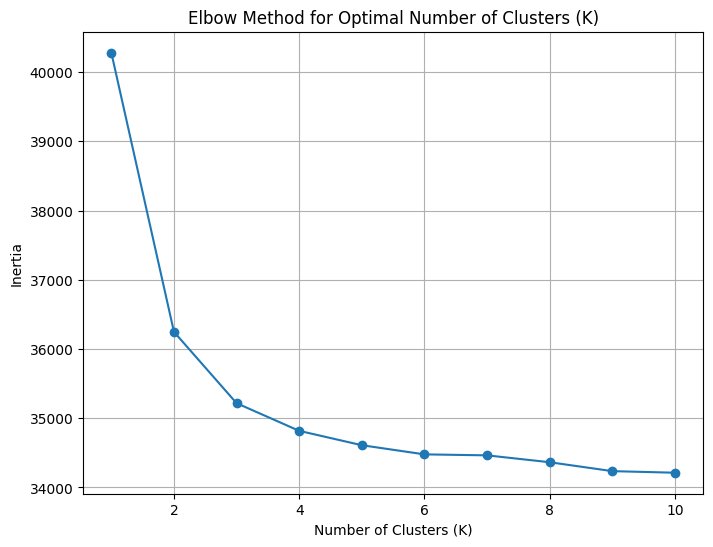

In [274]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [275]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_clusters = 3  # Set the optimal number of clusters

# Step 4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

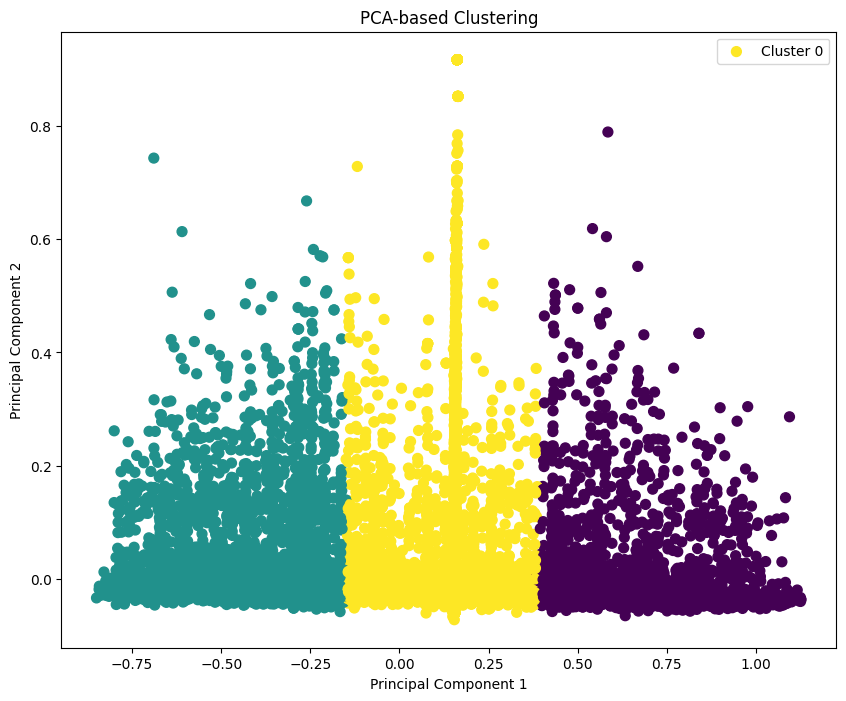

In [276]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-reduced data points with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)  # Adjust the size (s) as needed
plt.title('PCA-based Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend_labels = [f'Cluster {i}' for i in range(optimal_clusters)]
plt.legend(legend_labels, loc='upper right')

plt.show()

In [277]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_clusters = 4  # Set the optimal number of clusters

# Step 4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

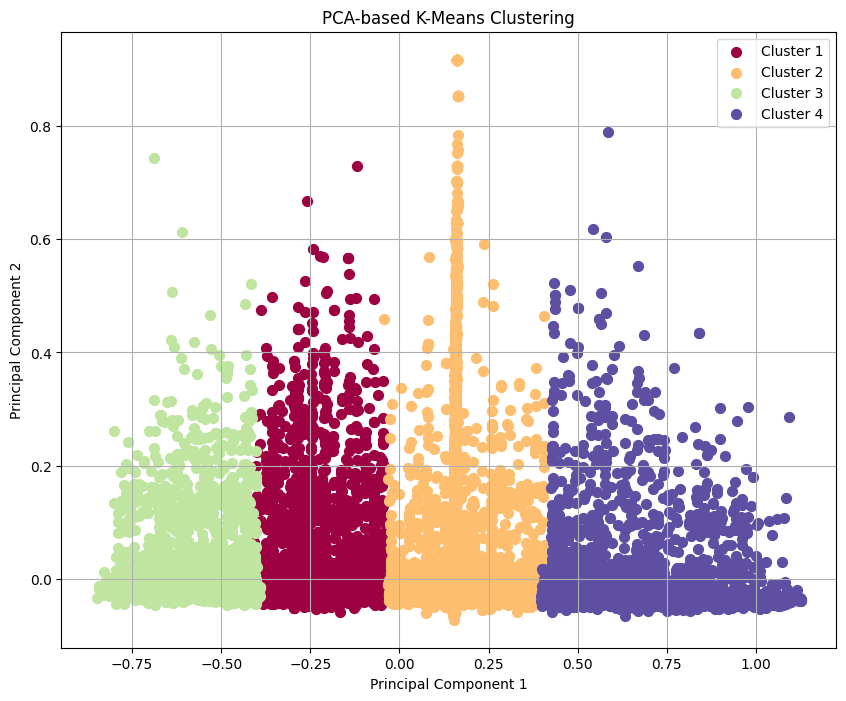

In [278]:
# Scatter plot of the clustering results
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, optimal_clusters))

for cluster_num in range(optimal_clusters):
    cluster_points = X_pca[cluster_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[cluster_num], label=f'Cluster {cluster_num + 1}')

plt.title("PCA-based K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [279]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.03541232950098727


In [280]:
# Add K-Means cluster labels to your DataFrame
train['kmeans_clusters'] = cluster_labels

In [281]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters
35208,2021-10-21 10:21:06+00:00,price targets raised in past hrs tsla from...,TSLA,"Tesla, Inc.",[],[],"[price, raised, past, boa, credit, keep, em, c...","[price, raise, past, boa, credit, keep, em, come]","[(price, NOUN), (raise, NOUN), (past, ADP), (b...","[[price, raise], [boa, credit]]","[price raise, boa credit]","[(price, raise), (raise, past), (past, boa), (...","[(price, raise, past), (raise, past, boa), (pa...",price raise past boa credit keep em come,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.3818,0
31569,2021-11-11 20:06:57+00:00,tsla volumes today only vs avg with one hou...,TSLA,"Tesla, Inc.",[],[],"[today, one, hour, left, trading, wouldnt, sur...","[today, one, hour, leave, trading, would, not,...","[(today, NOUN), (one, NUM), (hour, NOUN), (lea...","[[today, one, hour], [trading], [today], [boun...","[today one hour, trading, today, bounce tomorrow]","[(today, one), (one, hour), (hour, leave), (le...","[(today, one, hour), (one, hour, leave), (hour...",today one hour leave trading would not surpris...,"{'neg': 0.17, 'neu': 0.565, 'pos': 0.265, 'com...",0.3991,0
16848,2022-04-02 18:07:38+00:00,tsla released their production numbers today...,TSLA,"Tesla, Inc.",[],[],"[production, today, total, produced, first, ye...","[production, today, total, produce, first, yea...","[(production, NOUN), (today, NOUN), (total, NO...","[[production, today, total, produce], [year, i...","[production today total produce, year increase...","[(production, today), (today, total), (total, ...","[(production, today, total), (today, total, pr...",production today total produce first year incr...,"{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou...",0.6486,2
20157,2022-02-24 19:16:58+00:00,tsla still has plenty of room to drop,TSLA,"Tesla, Inc.",[],[],"[still, plenty, room, drop]","[still, plenty, room, drop]","[(still, ADV), (plenty, ADJ), (room, NOUN), (d...","[[room, drop]]",[room drop],"[(still, plenty), (plenty, room), (room, drop)]","[(still, plenty, room), (plenty, room, drop)]",still plenty room drop,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732,3
13688,2022-04-27 15:17:41+00:00,tesla tsla investors want to know whether elon...,TSLA,"Tesla, Inc.",[],[],"[want, know, whether, musk, going, sell, acqui...","[want, know, whether, musk, go, sell, acquire,...","[(want, VERB), (know, VERB), (whether, SCONJ),...","[[acquire, twitter], [attention]]","[acquire twitter, attention]","[(want, know), (know, whether), (whether, musk...","[(want, know, whether), (know, whether, musk),...",want know whether musk go sell acquire twitter...,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,1
3059,2022-08-21 12:01:22+00:00,when people will see tesla bot in days tsla,TSLA,"Tesla, Inc.",[],[],"[people, see, bot, days]","[people, see, bot, day]","[(people, NOUN), (see, VERB), (bot, PROPN), (d...","[[people], [day]]","[people, day]","[(people, see), (see, bot), (bot, day)]","[(people, see, bot), (see, bot, day)]",people see bot day,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
1824,2022-09-05 16:00:43+00:00,so how profitable would tsla be if you threw o...,TSLA,"Tesla, Inc.",[],[],"[profitable, would, threw, regulatory, credit,...","[profitable, would, throw, regulatory, credit,...","[(profitable, ADJ), (would, AUX), (throw, VERB...","[[credit, leasing, portion], [business], [char...","[credit leasing portion, business, chart, part...","[(profitable, would), (would, throw), (throw, ...","[(profitable, would, throw), (would, throw, re...",profitable would throw regulatory credit leasi...,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.6705,2
34277,2021-10-26 03:07:19+00:00,retweet if your ready for tesla acceptdoge,TSLA,"Tesla, Inc.",[Tesla],[AcceptDoge],[ready],[ready],"[(ready, ADJ)]",[],[],[],[],

## Fuzzy C Means Clustering

In [282]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=20dcb6ed4fbb1a1c84c1b9a4255f272289905121d76a7e45dcd8757fc214ed2f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [283]:
import numpy as np
import skfuzzy as fuzz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming you have your sentiment score column as 'sentiment_scores' and TF-IDF matrix in 'X'

# Step 1: Standardize your TF-IDF matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [284]:
# Step 2: Determine the Number of Clusters for Fuzzy C-Means
# Use the Fuzzy C-Means algorithm with varying cluster counts and select the optimal number of clusters
max_clusters = 10  # Adjust the maximum number of clusters as needed
best_silhouette_score = -1
optimal_clusters = 2  # Default to 2 clusters if no better option is found

for n_clusters in range(2, max_clusters + 1):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=n_clusters, m=2, error=0.005, maxiter=1000, seed=0)
    cluster_membership = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(X_scaled, cluster_membership)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        optimal_clusters = n_clusters

In [285]:
# Step 3: Perform Fuzzy C-Means Clustering with the Optimal Number of Clusters
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scaled.T, c=optimal_clusters, m=2, error=0.005, maxiter=1000, seed=0)
cluster_membership = np.argmax(u, axis=0)

In [286]:
# 'cluster_membership' now contains the cluster labels for each data point

# You can add the cluster labels to your DataFrame if needed
train['fuzzy_cmeans_clusters'] = cluster_membership

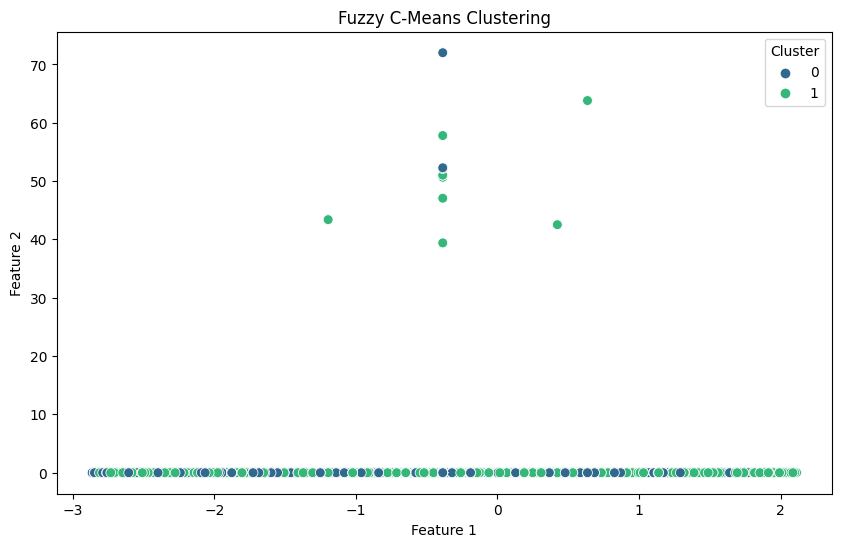

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cluster_membership' contains the cluster memberships obtained from the fuzzy C-Means clustering

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_membership, palette='viridis', s=50)
plt.title("Fuzzy C-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title='Cluster')
plt.show()

In [288]:
# Step 4: Evaluate Fuzzy C-Means Clustering
# Fuzzy Partition Coefficient (FPC)
print(f"Fuzzy Partition Coefficient (FPC): {fpc}")

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_membership)
print(f"Silhouette Score: {silhouette_avg}")

Fuzzy Partition Coefficient (FPC): 0.5000000000001684
Silhouette Score: 0.020786675677977037


## Agglomerative Hierarchical Clustering

In [289]:
import numpy as np

# Assuming you have a DataFrame named 'X' with your data
# Replace 'X' with the actual variable name holding your dataset

# Specify the sample size you want to select
sample_size = 5000

# Generate random indices within the range of your DataFrame's shape
random_indices = np.random.choice(X.shape[0], sample_size, replace=True)

# Use the random indices to select the corresponding rows from your DataFrame
sub_X = X.iloc[random_indices]

# Now, 'sub_X' contains a random subset of rows from your original DataFrame 'X'

In [290]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have your sentiment score column as 'sentiment_scores' and TF-IDF matrix in 'X'

# Step 1: Create a linkage matrix using your TF-IDF matrix
linkage_matrix = linkage(sub_X, method='ward')  # You can choose a different linkage method if needed

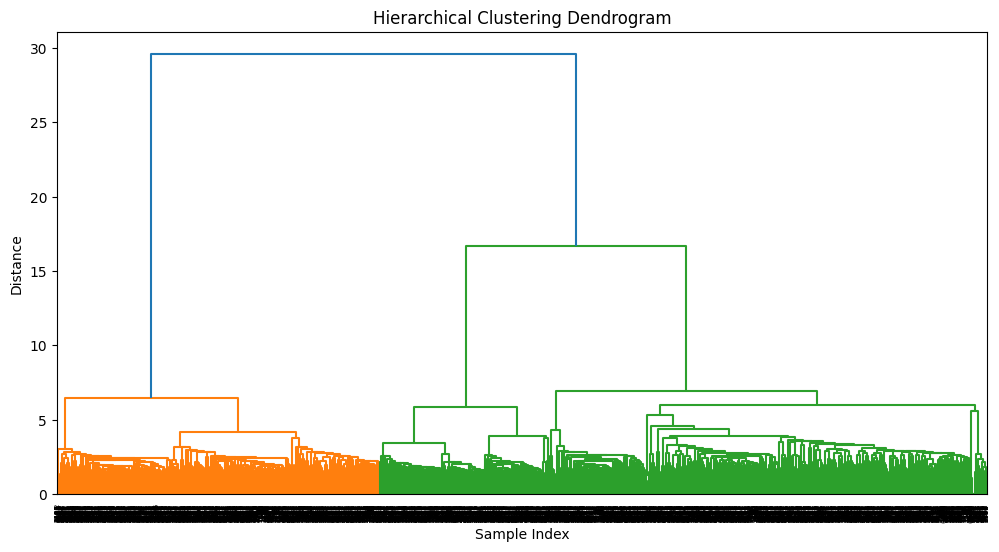

In [291]:
# Step 2: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=30, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [292]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Example: Determine the optimal number of clusters using the dendrogram
max_d = 50  # Set a maximum distance threshold for cutting the dendrogram
optimal_clusters = len(np.unique(fcluster(linkage_matrix, max_d, criterion='distance')))

In [293]:
# Step 4: Perform Hierarchical Clustering with the Optimal Number of Clusters
cluster_assignments = fcluster(linkage_matrix, max_d, criterion='distance')

# Stock Prediction using Sentiment Analysis & Generative Adversarial Network

In [294]:
train['tweets'] = dataset['Tweet']

In [295]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters,fuzzy_cmeans_clusters,tweets
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a...",medium do amazing job brainwash people today w...,"{'neg': 0.219, 'neu': 0.614, 'pos': 0.167, 'co...",-0.0516,1,1,Mainstream media has done an amazing job at br...
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[],delivery around,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,0,Tesla delivery estimates are at around 364k fr...
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested...",even include unvested additional equity x deal...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,1,3/ Even if I include 63.0M unvested RSUs as of...
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ...",still try stop get together make something wel...,"{'neg': 0.402, 'neu': 0.502, 'pos': 0.096, 'co...",-0.7717,3,1,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s...",stop try kill sad derange old man,"{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",-0.8750,3,0,"@RealDanODowd @Tesla Stop trying to kill kids,..."


In [296]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the 'text' column and create new columns for sentiment scores
train['sentiment_scores'] = train['tweets'].apply(get_sentiment_scores)

# Extract the compound sentiment score
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [297]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters,fuzzy_cmeans_clusters,tweets
5267,2022-07-28 16:36:43+00:00,tsla nothing changed still finding resistance ...,TSLA,"Tesla, Inc.",[],[],"[nothing, still, finding, resistance, upper, b...","[nothing, still, find, resistance, upper, bear...","[(nothing, PRON), (still, ADV), (find, VERB), ...","[[resistance], [divergence], [spy], [reverse]]","[resistance, divergence, spy, reverse]","[(nothing, still), (still, find), (find, resis...","[(nothing, still, find), (still, find, resista...",nothing still find resistance upper bearish di...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",0.5187,0,1,$TSLA nothing changed. Still finding resistanc...
20147,2022-02-24 19:42:14+00:00,i am not too concerned with elons sellingtimin...,TSLA,"Tesla, Inc.",[],[],"[concerned, another, story, thought, timing, bit]","[concern, another, story, think, time, bit]","[(concern, NOUN), (another, DET), (story, NOUN...","[[concern], [story], [time, bit]]","[concern, story, time bit]","[(concern, another), (another, story), (story,...","[(concern, another, story), (another, story, t...",concern another story think time bit,"{'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'comp...",-0.1901,1,0,I'm not too concerned with Elon's selling/timi...
733,2022-09-19 21:09:03+00:00,so costs are running higher than expected at ...,TSLA,"Tesla, Inc.",[],[],"[running, higher, f, wonder, going, decelerate]","[run, high, f, wonder, go, decelerate]","[(run, VERB), (high, ADJ), (f, PROPN), (wonder...","[[wonder], [decelerate]]","[wonder, decelerate]","[(run, high), (high, f), (f, wonder), (wonder,...","[(run, high, f), (high, f, wonder), (f, wonder...",run high f wonder go decelerate,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1,0,"So, costs are running $1bn higher than expecte..."
9360,2022-06-06 13:39:22+00:00,narcissistic egomaniacal genius discovers he h...,TSLA,"Tesla, Inc.",[],[],"[narcissistic, egomaniacal, genius, thereby, a...","[narcissistic, egomaniacal, genius, thereby, a...","[(narcissistic, ADJ), (egomaniacal, ADJ), (gen...","[[genius], [product, share, price, escape]]","[genius, product share price escape]","[(narcissistic, egomaniacal), (egomaniacal, ge...","[(narcissistic, egomaniacal, genius), (egomani...",narcissistic egomaniacal genius thereby also k...,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.4404,0,1,Narcissistic egomaniacal genius discovers he h...
507,2022-09-22 23:59:45+00:00,tsla shares have increased in value by basis ...,TSLA,"Tesla, Inc.",[],[],"[value, basis, per, day, days, since]","[value, basis, per, day, day, since]","[(value, NOUN), (basis, NOUN), (per, ADP), (da...","[[value, basis], [day, day]]","[value basis, day day]","[(value, basis), (basis, per), (per, day), (da...","[(value, basis, per), (basis, per, day), (per,...",value basis per day day since,"{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'comp...",0.6908,0,1,$TSLA shares have increased in value by 12 bas...
4263,2022-08-08 19:21:53+00:00,tsla once is crossed the structure will confi...,TSLA,"Tesla, Inc.",[],[],"[crossed, structure, confirm, corrective, mean...","[cross, structure, confirm, corrective, mean, ...","[(cross, NOUN), (structure, NOUN), (confirm, V...","[[cross, structure], [price, structure, price,...","[cross structure, price structure price action...","[(cross, structure), (structure, confirm), (co...","[(cross, structure, confirm), (structure, conf...",cross structure confirm corrective mean new du...,"{'neg': 0.03, 'neu': 0.97, 'pos': 0.0, 'compou...",-0.1027,1,0,$TSLA\nOnce 790 is crossed the structure will ...
13821,2022-04-26 18:19:34+00:00,for those asking todays tsla stephenson indica...,TSLA,"Tesla, Inc.",[],[],"[indicator, trading, advice, research, technic...","[indicator, trade, advice, research, technical...","[(indicator, NOUN), (tra

# ******

In [298]:
stock_tweets = train[['Date','compound_score']]

In [299]:
stock_tweets.sample(10)

,Date,compound_score
25611,2022-01-05 16:53:18+00:00,0.5984
9335,2022-06-06 18:03:01+00:00,0.7418
16344,2022-04-07 11:29:00+00:00,-0.7906
15278,2022-04-16 15:13:41+00:00,0.0000
32308,2021-11-07 23:28:11+00:00,0.7184
19845,2022-03-01 16:42:48+00:00,0.4939
33448,2021-10-31 15:03:08+00:00,0.5719
10159,2022-05-28 04:48:11+00:00,0.0000
22153,2022-02-01 14:21:36+00:00,0.4404
21404,2022-02-10 02:00:18+00:00,0.4939


In [300]:
stock_tweets.shape

(37422, 2)

In [301]:
stock_tweets['Date'] = pd.to_datetime(stock_tweets['Date'])
stock_tweets['Date'] = stock_tweets['Date'].dt.date

In [302]:
stock_tweets.head()

,Date,compound_score
0,2022-09-29,0.0772
1,2022-09-29,0.0000
2,2022-09-29,0.2960
3,2022-09-29,-0.7568
4,2022-09-29,-0.8750


In [303]:
stock_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37422 entries, 0 to 37421
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            37422 non-null  object 
 1   compound_score  37422 non-null  float64
dtypes: float64(1), object(1)
memory usage: 877.1+ KB


In [304]:
twitter_df = stock_tweets.groupby([stock_tweets['Date']]).mean()
print(twitter_df.shape)

(365, 1)


In [305]:
twitter_df.sample(10)

,compound_score
Date,
2022-03-05,0.307806
2022-07-26,0.098079
2021-12-26,0.213535
2022-05-02,0.224001
2022-02-28,0.147937
2022-06-07,0.113023
2022-05-12,0.108661
2021-10-04,0.135388
2022-03-16,0.120202


In [306]:
stocks = pd.read_csv('/kaggle/input/stock-tweets-for-sentiment-analysis-and-prediction/stock_yfinance_data.csv')
print(stocks.shape)
stocks.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [307]:
stock_name = 'TSLA'

In [308]:
stock_df = stocks[stocks['Stock Name'] == stock_name]
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

In [309]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [310]:
stock_df.shape

(252, 8)

In [311]:
final_df = stock_df.join(twitter_df, how="left", on="Date")
final_df = final_df.drop(columns=['Stock Name'])
print(final_df.shape)

(252, 8)


In [312]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,compound_score
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.238011
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.236109
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.135388
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,0.079698
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,0.199940


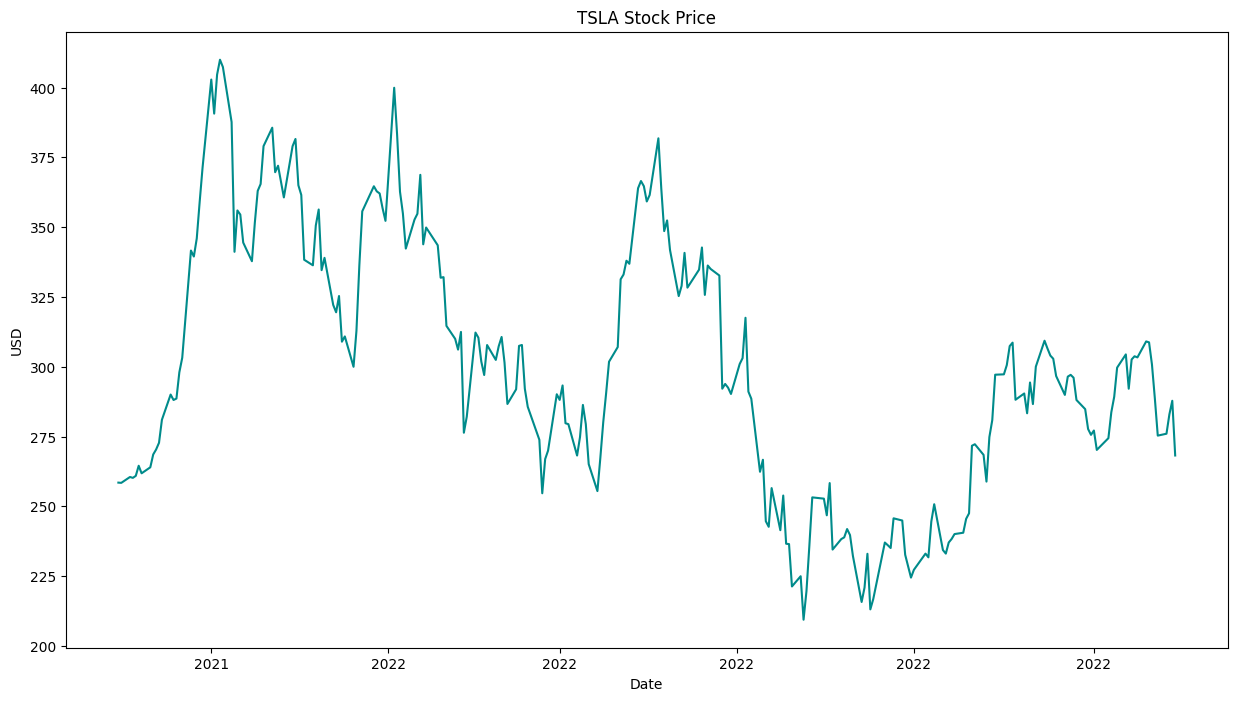

In [313]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter  # Import DateFormatter

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df['Date'], final_df['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"{stock_name} Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

## Adding technical indicators¶

**MA(7)** stans for Moving Average for past 7 days, whereas **MA(20)** means Moving Average for past 20 days.

**EMA** is Exponential Moving average and we can calculate it as:

EMA_t = Pclose + (EMA_t-1 (100 - P))*
**Bollinger Bands** are calculated as:

middle line: stdev(MA(20))
upper bound: MA(20) + 2stdev(MA(20))
lower bound: MA(20) - 2stdev(MA(20))

In [314]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() #Close Column

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [315]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,compound_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2021-10-28,356.103333,360.333344,351.399994,359.013336,359.013336,81639600,0.183726,325.127141,288.855501,-9.269895,32.580099,354.015698,223.695304,353.510805,5.880570
1,2021-10-29,360.619995,371.736664,357.736664,371.333344,371.333344,89755200,0.147079,336.946189,294.501834,-10.609662,36.566908,367.635649,221.368019,365.392497,5.914404
2,2021-11-01,381.666656,403.250000,372.886658,402.863342,402.863342,168146100,0.212828,351.926666,301.619501,-11.860446,42.906989,387.433479,215.805523,390.373061,5.996112
3,2021-11-02,386.453339,402.863342,382.000000,390.666656,390.666656,128213400,0.151930,364.418095,308.143001,-14.295169,46.078655,400.300312,215.985690,390.568791,5.965292
4,2021-11-03,392.443329,405.130005,384.206665,404.619995,404.619995,103885500,0.150985,373.418095,315.328168,-15.716662,49.410503,414.149173,216.507162,399.936260,6.000474


In [316]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

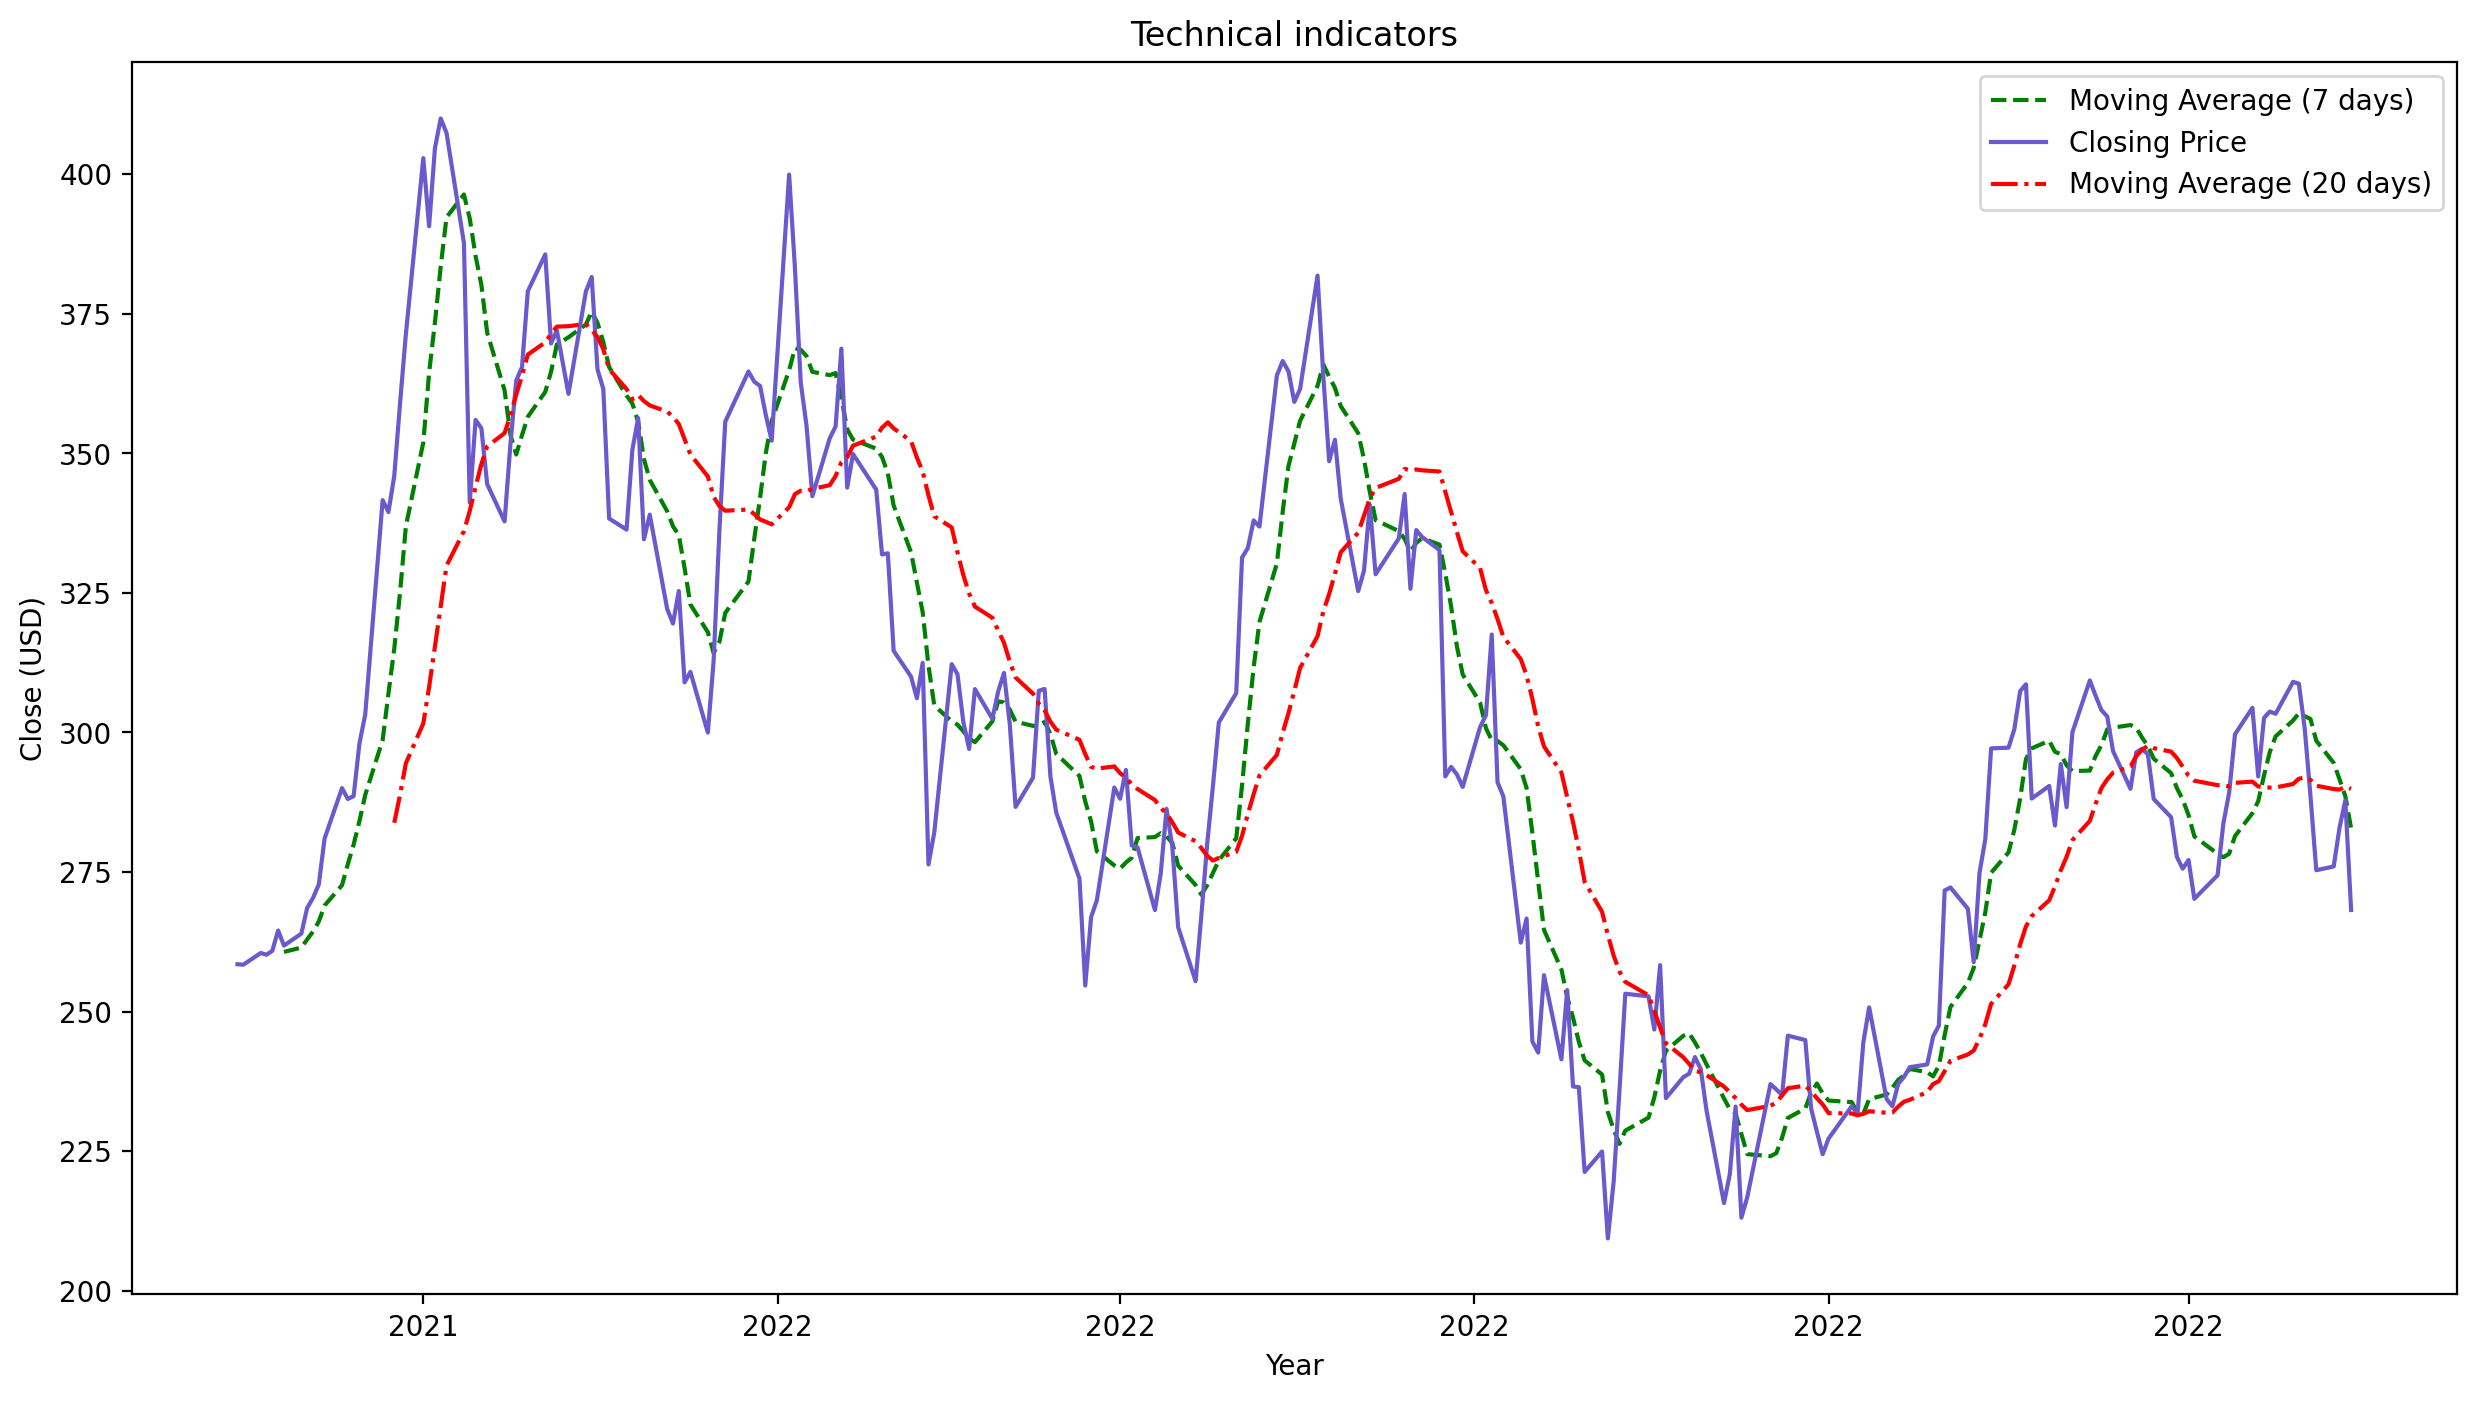

In [317]:
tech_ind(tech_df)

In [318]:
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill()])

In [319]:
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [320]:
def normalize_data(df, range, target_column):

    '''
    df: dataframe object
    range: type tuple -> (lower_bound, upper_bound)
        lower_bound: int
        upper_bound: int
    target_column: type str -> should reflect closing price of stock
    '''

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df.iloc[:, :])

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)
    
    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [321]:
def batch_data(x_data,y_data, batch_size, predict_period):
    X_batched, y_batched, yc = list(), list(), list()

    for i in range(0,len(x_data),1):
        x_value = x_data[i: i + batch_size][:, :]
        y_value = y_data[i + batch_size: i + batch_size + predict_period][:, 0]
        yc_value = y_data[i: i + batch_size][:, :]
        if len(x_value) == batch_size and len(y_value) == predict_period:
            X_batched.append(x_value)
            y_batched.append(y_value)
            yc.append(yc_value)

    return np.array(X_batched), np.array(y_batched), np.array(yc)

In [322]:
def split_train_test(data):
    train_size = len(data) - 20
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [323]:
def predict_index(dataset, X_train, batch_size, prediction_period):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[batch_size: X_train.shape[0] + batch_size + prediction_period, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + batch_size:, :].index

    return train_predict_index, test_predict_index

In [324]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from keras.utils.vis_utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [325]:
from sklearn.preprocessing import MinMaxScaler
import pickle  # Import the pickle module

X_scale_dataset,y_scale_dataset = normalize_data(dataset, (-1,1), "Close")
X_batched, y_batched, yc = batch_data(X_scale_dataset, y_scale_dataset, batch_size = 5, predict_period = 1)
print("X shape:", X_batched.shape)
print("y shape:", y_batched.shape)
print("yc shape:", yc.shape)

X_train, X_test, = split_train_test(X_batched)
y_train, y_test, = split_train_test(y_batched)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, 5, 1)

X shape: (227, 5, 15)
y shape: (227, 1)
yc shape: (227, 5, 1)


In [326]:
input_dim = X_train.shape[1] 
feature_size = X_train.shape[2] 
output_dim = y_train.shape[1]

## Build GAN model

In [327]:
def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential([LSTM(units = 1024, return_sequences = True, 
                                    input_shape=(input_dim, feature_size),recurrent_dropout = 0.3),
                               LSTM(units = 512, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 256, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 64, recurrent_dropout = 0.3),
                               Dense(32),
                               Dense(16),
                               Dense(8),
                               Dense(units=output_dim)])
    return model

In [328]:
def make_discriminator_model(input_dim):
    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(8, input_shape=(input_dim+1, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(16, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(32, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=1, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    #cnn_net.add(Flatten())
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net

In [329]:
def discriminator_loss(real_output, fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = loss_f(tf.ones_like(real_output), real_output)
    fake_loss = loss_f(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    loss = loss_f(tf.ones_like(fake_output), fake_output)
    return loss

In [330]:
@tf.function

def train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(real_x, training=True)
        generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
        d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
        real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
        d_real_input = tf.concat([real_y_reshape, yc], axis=1)

        real_output = discriminator(d_real_input, training=True)
        fake_output = discriminator(d_fake_input, training=True)

        g_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': g_loss}

In [331]:
def train(real_x, real_y, yc, Epochs, generator, discriminator, g_optimizer, d_optimizer, checkpoint = 50):
    train_info = {}
    train_info["discriminator_loss"] = []
    train_info["generator_loss"] = []

    for epoch in tqdm(range(Epochs)):
        real_price, fake_price, loss = train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer)
        G_losses = []
        D_losses = []
        Real_price = []
        Predicted_price = []
        D_losses.append(loss['d_loss'].numpy())
        G_losses.append(loss['g_loss'].numpy())
        Predicted_price.append(fake_price.numpy())
        Real_price.append(real_price.numpy())

        #Save model every X checkpoints
        if (epoch + 1) % checkpoint == 0:
            tf.keras.models.save_model(generator, f'./models_gan/{stock_name}/generator_V_%d.h5' % epoch)
            tf.keras.models.save_model(discriminator, f'./models_gan/{stock_name}/discriminator_V_%d.h5' % epoch)
            print('epoch', epoch + 1, 'discriminator_loss', loss['d_loss'].numpy(), 'generator_loss', loss['g_loss'].numpy())
    
        train_info["discriminator_loss"].append(D_losses)
        train_info["generator_loss"].append(G_losses)
  
    Predicted_price = np.array(Predicted_price)
    Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
    Real_price = np.array(Real_price)
    Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

    plt.subplot(2,1,1)
    plt.plot(train_info["discriminator_loss"], label='Disc_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(train_info["generator_loss"], label='Gen_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.legend()

    plt.show()

    return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

In [332]:
def plot_results(Real_price, Predicted_price, index_train):
    X_scaler = load(open('/content/X_scaler.pkl', 'rb'))
    y_scaler = load(open('/content/y_scaler.pkl', 'rb'))
    train_predict_index = index_train

    rescaled_Real_price = y_scaler.inverse_transform(Real_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color = 'r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

In [333]:
## Test Code

@tf.function 

def eval_op(generator, real_x):
    generated_data = generator(real_x, training = False)

    return generated_data

In [334]:
def plot_test_data(Real_test_price, Predicted_test_price, index_test):
    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = index_test

    rescaled_Real_price = y_scaler.inverse_transform(Real_test_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_test_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('Test RMSE: ', RMSE)
    
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], color='#00008B')
    plt.plot(predict_result["predicted_mean"], color = '#8B0000', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title(f"Prediction on test data for {stock_name}", fontsize=20)
    plt.show()

In [335]:
learning_rate = 5e-4
epochs = 500

g_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
d_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)

generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = make_discriminator_model(X_train.shape[1])

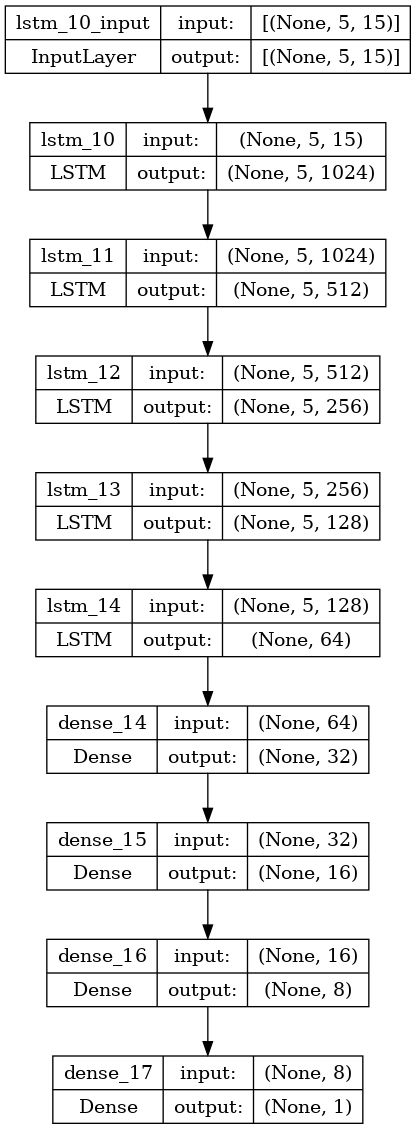

In [336]:
plot_model(generator, to_file='generator_keras_model.png', show_shapes=True)

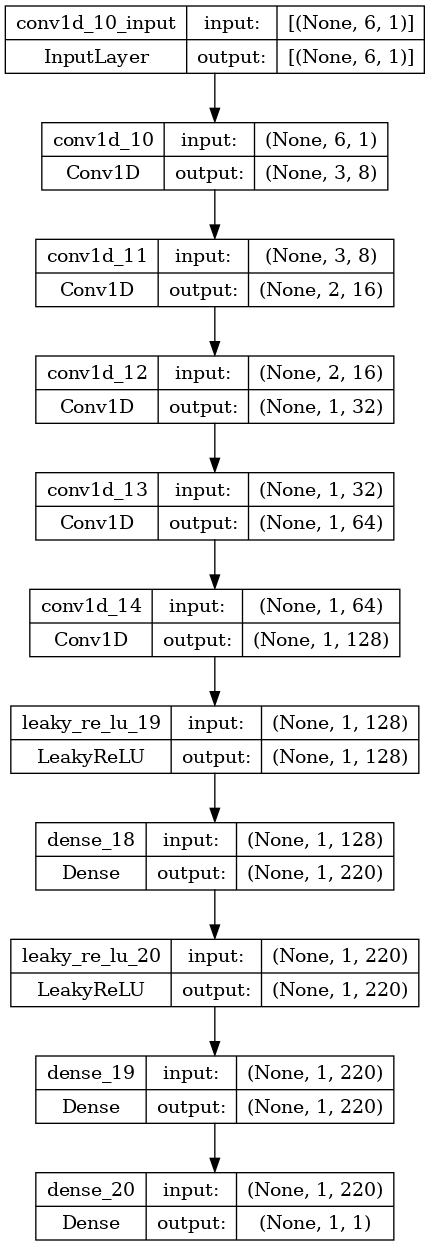

In [337]:
tf.keras.utils.plot_model(discriminator, to_file='discriminator_keras_model.png', show_shapes=True)

## Train and test model

 10%|█         | 50/500 [01:07<06:55,  1.08it/s] 

epoch 50 discriminator_loss 1.3876804 generator_loss 0.65364134


 20%|██        | 100/500 [01:52<06:15,  1.06it/s]

epoch 100 discriminator_loss 1.4218018 generator_loss 0.6918932


 30%|███       | 150/500 [02:37<05:24,  1.08it/s]

epoch 150 discriminator_loss 1.3847489 generator_loss 0.69312525


 40%|████      | 200/500 [03:22<04:50,  1.03it/s]

epoch 200 discriminator_loss 1.3876138 generator_loss 0.6918677


 50%|█████     | 250/500 [04:07<03:53,  1.07it/s]

epoch 250 discriminator_loss 1.3866513 generator_loss 0.69293046


 60%|██████    | 300/500 [04:52<03:15,  1.02it/s]

epoch 300 discriminator_loss 1.3858668 generator_loss 0.69410425


 70%|███████   | 350/500 [05:37<02:17,  1.09it/s]

epoch 350 discriminator_loss 1.3862665 generator_loss 0.6921878


 80%|████████  | 400/500 [06:21<01:32,  1.09it/s]

epoch 400 discriminator_loss 1.3864124 generator_loss 0.69294775


 90%|█████████ | 450/500 [07:06<00:46,  1.06it/s]

epoch 450 discriminator_loss 1.3848646 generator_loss 0.69495887


100%|██████████| 500/500 [07:52<00:00,  1.06it/s]

epoch 500 discriminator_loss 1.3854046 generator_loss 0.69318163


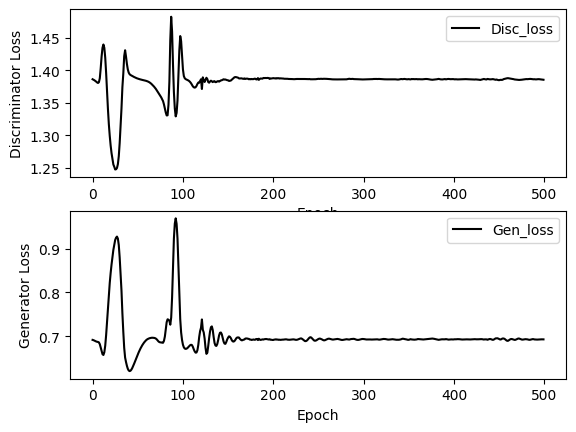

In [338]:
predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

In [339]:
test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')

Test RMSE:  13.500286617979112


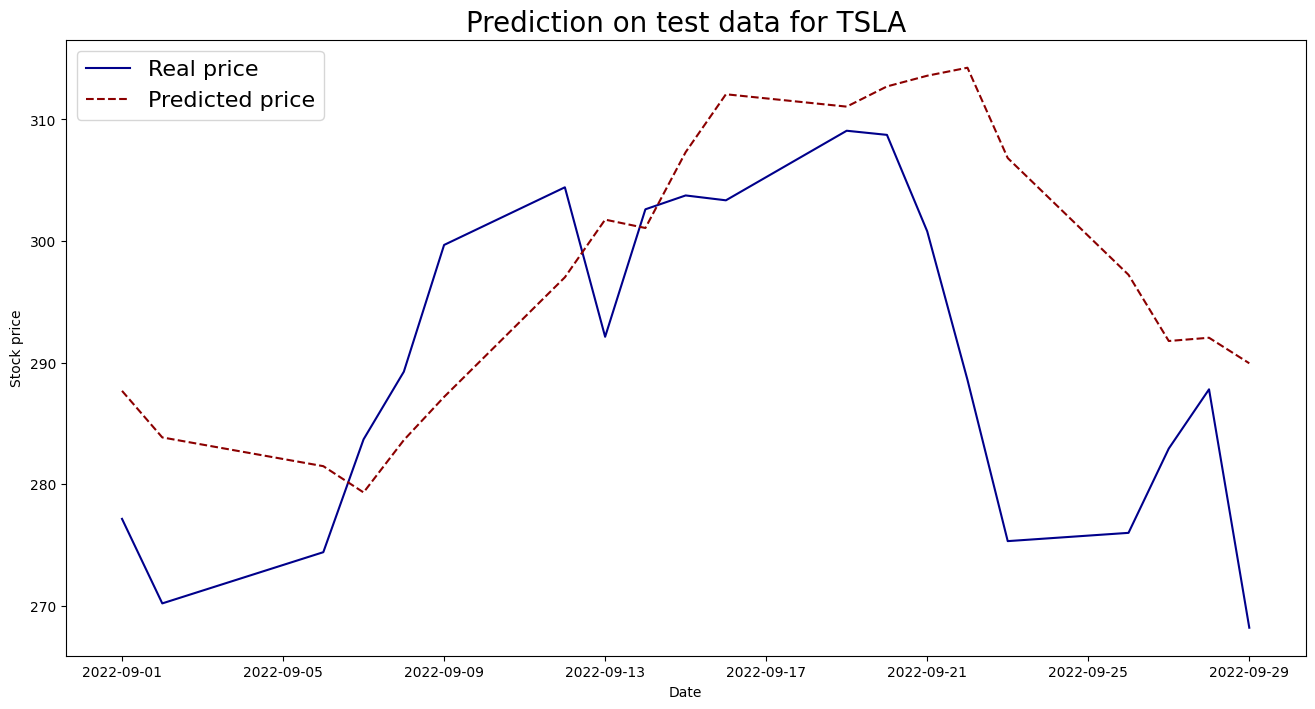

In [340]:
predicted_test_data = eval_op(test_generator, X_test)
plot_test_data(y_test, predicted_test_data,index_test)

## **Conclusions**
As we can see, GAN models can perform quite well with time series and even stock data. Moreover, using raw historical data gives quite poor predictions, but when we add technical indicators and Twitter sentiment analysis it becomes much easier for the model to make predictions.

This might not work for "less popular" stock tickers as the number of tweets about such stocks gets drastically lower than, for example, Tesla. In this case sentiment scores might fail to give the bigger picture and might even decrease model results.